In [1]:
import pandas as pd
import folium
from folium.plugins import MeasureControl
import branca.colormap as cm

# Load your station and rainfall data
epmaps_stations = pd.read_csv('EPMAPS_stations.csv')
fonag_stations = pd.read_csv('FONAG_stations.csv')
rainfall_data = pd.read_csv('all_stations_daily_rainfall.csv')

# Merge the EPMAPS and FONAG stations
merged_stations = pd.concat([epmaps_stations, fonag_stations], axis=0)

# Merge the rainfall data with the station metadata
rainfall_with_stations = pd.merge(rainfall_data, merged_stations, left_on='station_id', right_on='id_estacion', how='left')

# Prepare the data with coordinates, station names, and codes
rainfall_with_station_info = rainfall_with_stations[['fecha', 'PRECIPITACION SUM', 'station_id', 'punto_obs', 'codigo', 'latitud', 'longitud']]

# Calculate the date of the previous day for the title
from datetime import datetime, timedelta
yesterday = (datetime.today() - timedelta(days=1)).strftime('%Y-%m-%d')

# Set up the color scale (red for high, blue for low rainfall)
min_rainfall = rainfall_with_station_info['PRECIPITACION SUM'].min()
max_rainfall = rainfall_with_station_info['PRECIPITACION SUM'].max()
colormap = cm.linear.RdYlBu_09.scale(min_rainfall, max_rainfall)

# Create the map centered on the general area of the stations
m = folium.Map(location=[-0.2, -78.5], zoom_start=10, tiles='OpenStreetMap')

# Add a scale bar (MeasureControl includes distance scale)
m.add_child(MeasureControl())

# Add rainfall data as markers with radius proportional to rainfall value and solid color
for _, row in rainfall_with_station_info.iterrows():
    folium.CircleMarker(
        location=[row['latitud'], row['longitud']],
        radius=max(3, row['PRECIPITACION SUM'] * 0.5),  # Scale the marker size
        popup=f"Station: {row['punto_obs']}<br>Rainfall: {row['PRECIPITACION SUM']} mm",
        color=colormap(row['PRECIPITACION SUM']),  # Marker border color
        fill=True,
        fill_color=colormap(row['PRECIPITACION SUM']),  # Marker fill color
        fill_opacity=1,  # Solid fill
        opacity=1  # Solid border
    ).add_to(m)

# Add the color scale bar to the map
colormap.add_to(m)

# Add a title using folium's HTML feature
title_html = f'''
    <h3 align="center" style="font-size:20px"><b>Precipitación Diaria del {yesterday}</b></h3>
    '''
m.get_root().html.add_child(folium.Element(title_html))

# Save the map as an HTML file
m.save('rainfall_map_with_solid_points.html')



BORDER LINES

In [8]:
import pandas as pd
import folium
from folium.plugins import MeasureControl
import geopandas as gpd
import branca.colormap as cm

# Load your station and rainfall data
epmaps_stations = pd.read_csv('EPMAPS_stations.csv')
fonag_stations = pd.read_csv('FONAG_stations.csv')
rainfall_data = pd.read_csv('all_stations_daily_rainfall.csv')

# Merge the EPMAPS and FONAG stations
merged_stations = pd.concat([epmaps_stations, fonag_stations], axis=0)

# Merge the rainfall data with the station metadata
rainfall_with_stations = pd.merge(rainfall_data, merged_stations, left_on='station_id', right_on='id_estacion', how='left')

# Prepare the data with coordinates, station names, and codes
rainfall_with_station_info = rainfall_with_stations[['fecha', 'PRECIPITACION SUM', 'station_id', 'punto_obs', 'codigo', 'latitud', 'longitud']]

# Calculate the date of the previous day for the title
from datetime import datetime, timedelta
yesterday = (datetime.today() - timedelta(days=1)).strftime('%Y-%m-%d')

# Set up the color scale (red for high, blue for low rainfall)
min_rainfall = rainfall_with_station_info['PRECIPITACION SUM'].min()
max_rainfall = rainfall_with_station_info['PRECIPITACION SUM'].max()
colormap = cm.linear.RdYlBu_09.scale(min_rainfall, max_rainfall)

# Create the map centered on the general area of the stations
m = folium.Map(location=[-0.2, -78.5], zoom_start=10, tiles='CartoDB positron')

# Load the GeoPackage with polygons and add boundaries to the map (added first)
gdf = gpd.read_file('Area.gpkg')

# Add the polygon boundaries (outline only) to the map
for _, poly in gdf.iterrows():
    folium.GeoJson(
        poly['geometry'],
        style_function=lambda feature: {
            'color': 'black',  # Boundary color
            'weight': 2,       # Boundary thickness
            'fillOpacity': 0,  # No fill, only boundary
        }
    ).add_to(m)

# Add a scale bar (MeasureControl includes distance scale)
m.add_child(MeasureControl())

# Add rainfall data as markers, with radius proportional to rainfall value and solid color (added last for layering on top)
for _, row in rainfall_with_station_info.iterrows():
    folium.CircleMarker(
        location=[row['latitud'], row['longitud']],
        radius=max(3, row['PRECIPITACION SUM'] * 0.5),  # Scale the marker size
        popup=f"Station: {row['punto_obs']}<br>Rainfall: {row['PRECIPITACION SUM']} mm",
        color=colormap(row['PRECIPITACION SUM']),  # Marker border color
        fill=True,
        fill_color=colormap(row['PRECIPITACION SUM']),  # Marker fill color
        fill_opacity=1,  # Solid fill
        opacity=1  # Solid border
    ).add_to(m)

# Add the color scale bar to the map
colormap.add_to(m)

# Add a title using folium's HTML feature
title_html = f'''
    <h3 align="center" style="font-size:20px"><b>Precipitación Diaria del {yesterday} - Red de estaciones EPMAPS- FONAG</b></h3>
    '''

logo_html_footer = '''
     <div style="position: fixed; bottom: 10px; left: 50px; width: 100%; text-align: center; z-index: 9999;">
         <img src="Fonag-Color.png" style="width:150px; height:auto; display: inline-block;">
         <img src="Logo EPMAPS 15 5 23 (Interno).jpg" style="width:150px; height:auto; display: inline-block;">
         <img src="Logo EPMAPS y Alcaldía Quito Renace 15 5 23.jpg" style="width:150px; height:auto; display: inline-block;">
         <img src="inamhi-logo-LETRA-AZUL.png" style="width:150px; height:auto; display: inline-block;">
     </div>
'''

# Add the logos to the map as HTML
m.get_root().html.add_child(folium.Element(logo_html_footer))
m.get_root().html.add_child(folium.Element(title_html))
# Save the map as an HTML file
m.save('Mapa_diario_EPMAPS_FONAG_interactivo.html')




# Interpolation

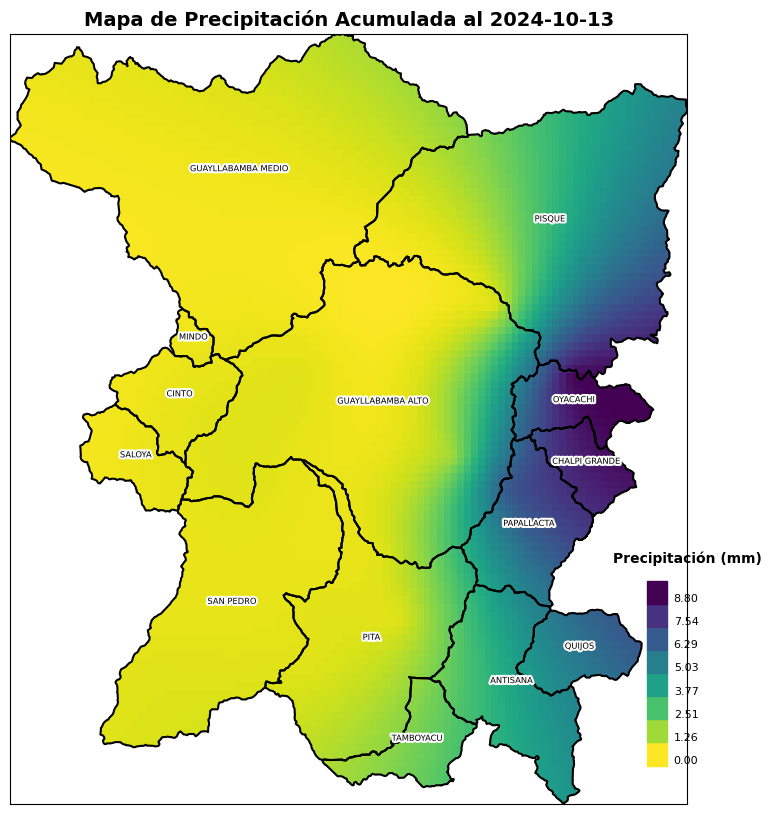

In [18]:

import pandas as pd
import folium
from folium.plugins import MeasureControl
import geopandas as gpd
import branca.colormap as cm
import numpy as np
from metpy.interpolate import interpolate_to_points
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as PathEffects
from shapely.geometry import Polygon
from shapely.ops import unary_union

# Load your station and rainfall data
epmaps_stations = pd.read_csv('EPMAPS_stations.csv')
fonag_stations = pd.read_csv('FONAG_stations.csv')
rainfall_data = pd.read_csv('all_stations_daily_rainfall.csv')

# Merge the EPMAPS and FONAG stations
merged_stations = pd.concat([epmaps_stations, fonag_stations], axis=0)

# Merge the rainfall data with the station metadata
rainfall_with_stations = pd.merge(rainfall_data, merged_stations, left_on='station_id', right_on='id_estacion', how='left')

# Prepare the data with coordinates, station names, and codes
rainfall_with_station_info = rainfall_with_stations[['fecha', 'PRECIPITACION SUM', 'station_id', 'punto_obs', 'codigo', 'latitud', 'longitud']]

# Calculate the date of the previous day for the title
from datetime import datetime, timedelta
yesterday = (datetime.today() - timedelta(days=1)).strftime('%Y-%m-%d')

# Set up the color scale (red for high, blue for low rainfall)
min_rainfall = rainfall_with_station_info['PRECIPITACION SUM'].min()
max_rainfall = rainfall_with_station_info['PRECIPITACION SUM'].max()
colormap = cm.linear.RdYlBu_09.scale(min_rainfall, max_rainfall)

# Create the map centered on the general area of the stations
m = folium.Map(location=[-0.2, -78.5], zoom_start=10, tiles='CartoDB positron')

# Load the GeoPackage with polygons and add boundaries to the map
gdf = gpd.read_file('Area.gpkg')

# Add the polygon boundaries (outline only) to the map
for _, poly in gdf.iterrows():
    folium.GeoJson(
        poly['geometry'],
        style_function=lambda feature: {
            'color': 'black',
            'weight': 2,
            'fillOpacity': 0,
        }
    ).add_to(m)

# Add a scale bar (MeasureControl includes distance scale)
m.add_child(MeasureControl())

# Perform interpolation
def perform_interpolation(data, provincias_gdf):
    x_min, y_min, x_max, y_max = provincias_gdf.total_bounds
    grid_x, grid_y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
    grid_points = np.column_stack([grid_x.ravel(), grid_y.ravel()])

    grid_z = interpolate_to_points(
        data[['longitud', 'latitud']].values, 
        data['PRECIPITACION SUM'].values, 
        grid_points, 
        interp_type='rbf', 
        rbf_func='linear', 
        rbf_smooth=0
    ).reshape(grid_x.shape)

    return grid_z, (x_min, y_min, x_max, y_max)

# Interpolate rainfall data
grid_z, bounds = perform_interpolation(rainfall_with_station_info, gdf)

# Function to create static plot
def create_static_plot(grid_z, bounds, provincias_gdf, rainfall_with_station_info):
    x_min, y_min, x_max, y_max = bounds

    large_polygon = Polygon([(x_min, y_min), (x_min, y_max), (x_max, y_max), (x_max, y_min)])
    outside_provinces = large_polygon.difference(unary_union(provincias_gdf.geometry))
    outside_provinces_gdf = gpd.GeoDataFrame(geometry=[outside_provinces], crs="EPSG:4326")

    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot the interpolated grid
    plt.imshow(grid_z.T, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='viridis_r')

    # Plot the province boundaries
    outside_provinces_gdf.plot(ax=ax, color='white')
    provincias_gdf.boundary.plot(ax=ax, edgecolor='black')

    # Scale bar (move slightly to the right)
    min_precip = rainfall_with_station_info['PRECIPITACION SUM'].min()
    max_precip = rainfall_with_station_info['PRECIPITACION SUM'].max()
    num_intervals = 8
    scale_values = np.linspace(min_precip, max_precip, num_intervals)
    scale_colors = plt.cm.viridis_r(np.linspace(0, 1, len(scale_values)))

    bar_width, bar_height = 0.03, 0.03
    bar_x = 0.94  # Move scale bar to the right
    bar_y_start = 0.05

    # Add scale bar text (Precipitation mm)
    ax.text(bar_x - 0.05, bar_y_start + num_intervals * bar_height + 0.02, 'Precipitación (mm)', 
            transform=ax.transAxes, verticalalignment='bottom', fontsize=10, fontweight='bold')

    # Create scale bar (color patches)
    for i, value in enumerate(scale_values):
        bar_y = bar_y_start + i * bar_height
        rect = patches.Rectangle((bar_x, bar_y), bar_width, bar_height, 
                                 transform=ax.transAxes, color=scale_colors[i])
        ax.add_patch(rect)
        ax.text(bar_x + bar_width + 0.01, bar_y, f'{value:.2f}', 
                transform=ax.transAxes, verticalalignment='bottom', fontsize=8)

    # Annotate using 'NAM' column
    for idx, row in provincias_gdf.iterrows():
        annotation = plt.annotate(text=row['NAM'], 
                                  xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                                  xytext=(1,1), textcoords="offset points", 
                                  ha='center', fontsize='6')
        annotation.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='white')])

    # Remove axis ticks and labels for a cleaner look
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Add title for the plot
    plt.title(f'Mapa de Precipitación Acumulada al {yesterday}', fontsize=14, fontweight='bold')

    # Save and show plot
    plt.savefig('static_precipitation_plot.png', dpi=600, bbox_inches='tight', pad_inches=0.1)
    plt.show()

# Call the static plot creation
create_static_plot(grid_z, bounds, gdf, rainfall_with_station_info)

# Add rainfall data as markers, with radius proportional to rainfall value and solid color
for _, row in rainfall_with_station_info.iterrows():
    folium.CircleMarker(
        location=[row['latitud'], row['longitud']],
        radius=max(3, row['PRECIPITACION SUM'] * 0.5),  # Scale the marker size
        popup=f"Station: {row['punto_obs']}<br>Rainfall: {row['PRECIPITACION SUM']} mm",
        color=colormap(row['PRECIPITACION SUM']),  # Marker border color
        fill=True,
        fill_color=colormap(row['PRECIPITACION SUM']),  # Marker fill color
        fill_opacity=1,
        opacity=1
    ).add_to(m)

# Add the color scale bar to the map
colormap.add_to(m)

# Add a title using folium's HTML feature
title_html = f'''
    <h3 align="center" style="font-size:20px"><b>Precipitación Diaria del {yesterday} - Red de estaciones EPMAPS- FONAG</b></h3>
    '''
logo_html_footer = '''
     <div style="position: fixed; bottom: 10px; left: 50px; width: 100%; text-align: center; z-index: 9999;">
         <img src="Fonag-Color.png" style="width:150px; height:auto; display: inline-block;">
         <img src="Logo EPMAPS 15 5 23 (Interno).jpg" style="width:150px; height:auto; display: inline-block;">
         <img src="Logo EPMAPS y Alcaldía Quito Renace 15 5 23.jpg" style="width:150px; height:auto; display: inline-block;">
         <img src="inamhi-logo-LETRA-AZUL.png" style="width:150px; height:auto; display: inline-block;">
     </div>
'''

# Add the logos to the map as HTML
m.get_root().html.add_child(folium.Element(logo_html_footer))
m.get_root().html.add_child(folium.Element(title_html))

# Save the map as an HTML file
m.save('Mapa_diario_EPMAPS_FONAG_interactivo.html')


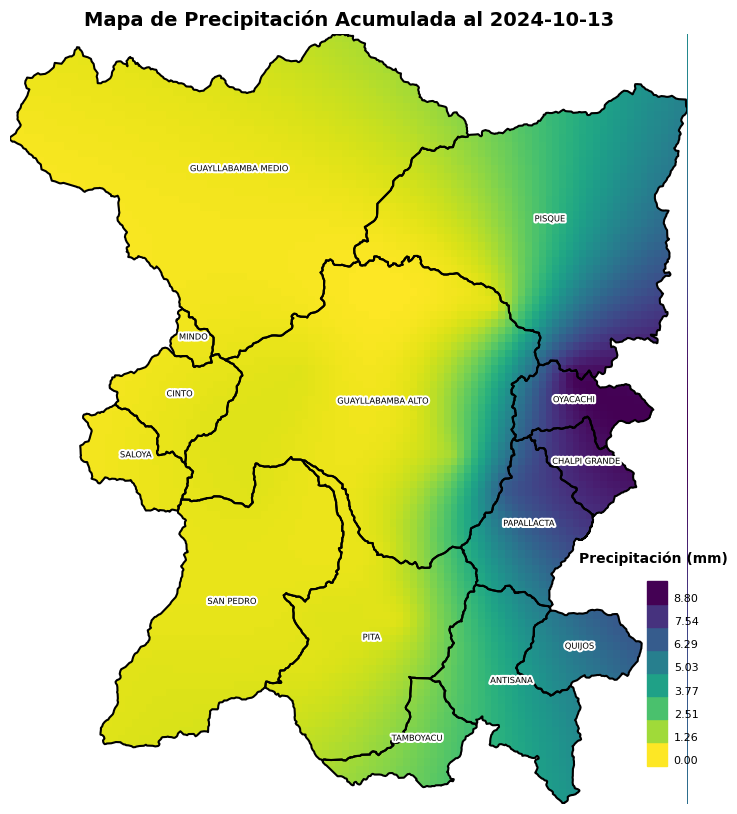

In [20]:
import pandas as pd
import folium
from folium.plugins import MeasureControl
import geopandas as gpd
import branca.colormap as cm
import numpy as np
from metpy.interpolate import interpolate_to_points
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as PathEffects
from shapely.geometry import Polygon
from shapely.ops import unary_union

# Load your station and rainfall data
epmaps_stations = pd.read_csv('EPMAPS_stations.csv')
fonag_stations = pd.read_csv('FONAG_stations.csv')
rainfall_data = pd.read_csv('all_stations_daily_rainfall.csv')

# Merge the EPMAPS and FONAG stations
merged_stations = pd.concat([epmaps_stations, fonag_stations], axis=0)

# Merge the rainfall data with the station metadata
rainfall_with_stations = pd.merge(rainfall_data, merged_stations, left_on='station_id', right_on='id_estacion', how='left')

# Prepare the data with coordinates, station names, and codes
rainfall_with_station_info = rainfall_with_stations[['fecha', 'PRECIPITACION SUM', 'station_id', 'punto_obs', 'codigo', 'latitud', 'longitud']]

# Calculate the date of the previous day for the title
from datetime import datetime, timedelta
yesterday = (datetime.today() - timedelta(days=1)).strftime('%Y-%m-%d')

# Set up the color scale (red for high, blue for low rainfall)
min_rainfall = rainfall_with_station_info['PRECIPITACION SUM'].min()
max_rainfall = rainfall_with_station_info['PRECIPITACION SUM'].max()
colormap = cm.linear.RdYlBu_09.scale(min_rainfall, max_rainfall)

# Create the map centered on the general area of the stations
m = folium.Map(location=[-0.2, -78.5], zoom_start=10, tiles='CartoDB positron')

# Load the GeoPackage with polygons and add boundaries to the map
gdf = gpd.read_file('Area.gpkg')

# Add the polygon boundaries (outline only) to the map
for _, poly in gdf.iterrows():
    folium.GeoJson(
        poly['geometry'],
        style_function=lambda feature: {
            'color': 'black',
            'weight': 2,
            'fillOpacity': 0,
        }
    ).add_to(m)

# Add a scale bar (MeasureControl includes distance scale)
m.add_child(MeasureControl())

# Perform interpolation
def perform_interpolation(data, provincias_gdf):
    x_min, y_min, x_max, y_max = provincias_gdf.total_bounds
    grid_x, grid_y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
    grid_points = np.column_stack([grid_x.ravel(), grid_y.ravel()])

    grid_z = interpolate_to_points(
        data[['longitud', 'latitud']].values, 
        data['PRECIPITACION SUM'].values, 
        grid_points, 
        interp_type='rbf', 
        rbf_func='linear', 
        rbf_smooth=0
    ).reshape(grid_x.shape)

    return grid_z, (x_min, y_min, x_max, y_max)

# Interpolate rainfall data
grid_z, bounds = perform_interpolation(rainfall_with_station_info, gdf)

# Function to create static plot
def create_static_plot(grid_z, bounds, provincias_gdf, rainfall_with_station_info):
    x_min, y_min, x_max, y_max = bounds

    large_polygon = Polygon([(x_min, y_min), (x_min, y_max), (x_max, y_max), (x_max, y_min)])
    outside_provinces = large_polygon.difference(unary_union(provincias_gdf.geometry))
    outside_provinces_gdf = gpd.GeoDataFrame(geometry=[outside_provinces], crs="EPSG:4326")

    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot the interpolated grid
    plt.imshow(grid_z.T, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='viridis_r')

    # Plot the province boundaries
    outside_provinces_gdf.plot(ax=ax, color='white')
    provincias_gdf.boundary.plot(ax=ax, edgecolor='black')

    # Scale bar (move more to the right)
    min_precip = rainfall_with_station_info['PRECIPITACION SUM'].min()
    max_precip = rainfall_with_station_info['PRECIPITACION SUM'].max()
    num_intervals = 8
    scale_values = np.linspace(min_precip, max_precip, num_intervals)
    scale_colors = plt.cm.viridis_r(np.linspace(0, 1, len(scale_values)))

    bar_width, bar_height = 0.03, 0.03
    bar_x = 0.94  # Move legend (scale bar) further to the right, adjust this value to move it further or closer
    bar_y_start = 0.05

    # Add scale bar text (Precipitation mm)
    ax.text(bar_x - 0.1, bar_y_start + num_intervals * bar_height + 0.02, 'Precipitación (mm)', 
            transform=ax.transAxes, verticalalignment='bottom', fontsize=10, fontweight='bold')

    # Create scale bar (color patches)
    for i, value in enumerate(scale_values):
        bar_y = bar_y_start + i * bar_height
        rect = patches.Rectangle((bar_x, bar_y), bar_width, bar_height, 
                                 transform=ax.transAxes, color=scale_colors[i])
        ax.add_patch(rect)
        ax.text(bar_x + bar_width + 0.01, bar_y, f'{value:.2f}', 
                transform=ax.transAxes, verticalalignment='bottom', fontsize=8)

    # Annotate using 'NAM' column
    for idx, row in provincias_gdf.iterrows():
        annotation = plt.annotate(text=row['NAM'], 
                                  xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                                  xytext=(1,1), textcoords="offset points", 
                                  ha='center', fontsize='6')
        annotation.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='white')])

    # Remove axis ticks and labels for a cleaner look
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Add title for the plot
    plt.title(f'Mapa de Precipitación Acumulada al {yesterday}', fontsize=14, fontweight='bold')

    # Save and show plot
    plt.savefig('static_precipitation_plot.png', dpi=600, bbox_inches='tight', pad_inches=0.1)
    plt.show()

# Call the static plot creation
create_static_plot(grid_z, bounds, gdf, rainfall_with_station_info)

# Add rainfall data as markers, with radius proportional to rainfall value and solid color
for _, row in rainfall_with_station_info.iterrows():
    folium.CircleMarker(
        location=[row['latitud'], row['longitud']],
        radius=max(3, row['PRECIPITACION SUM'] * 0.5),  # Scale the marker size
        popup=f"Station: {row['punto_obs']}<br>Rainfall: {row['PRECIPITACION SUM']} mm",
        color=colormap(row['PRECIPITACION SUM']),  # Marker border color
        fill=True,
        fill_color=colormap(row['PRECIPITACION SUM']),  # Marker fill color
        fill_opacity=1,
        opacity=1
    ).add_to(m)

# Add the color scale bar to the map
colormap.add_to(m)

# Add a title using folium's HTML feature
title_html = f'''
    <h3 align="center" style="font-size:20px"><b>Precipitación Diaria del {yesterday} - Red de estaciones EPMAPS- FONAG</b></h3>
    '''
logo_html_footer = '''
     <div style="position: fixed; bottom: 10px; left: 50px; width: 100%; text-align: center; z-index: 9999;">
         <img src="Fonag-Color.png" style="width:150px; height:auto; display: inline-block;">
         <img src="Logo EPMAPS 15 5 23 (Interno).jpg" style="width:150px; height:auto; display: inline-block;">
         <img src="Logo EPMAPS y Alcaldía Quito Renace 15 5 23.jpg" style="width:150px; height:auto; display: inline-block;">
         <img src="inamhi-logo-LETRA-AZUL.png" style="width:150px; height:auto; display: inline-block;">
     </div>
'''

# Add the logos to the map as HTML
m.get_root().html.add_child(folium.Element(logo_html_footer))
m.get_root().html.add_child(folium.Element(title_html))

# Save the map as an HTML file
m.save('Mapa_diario_EPMAPS_FONAG_interactivo.html')


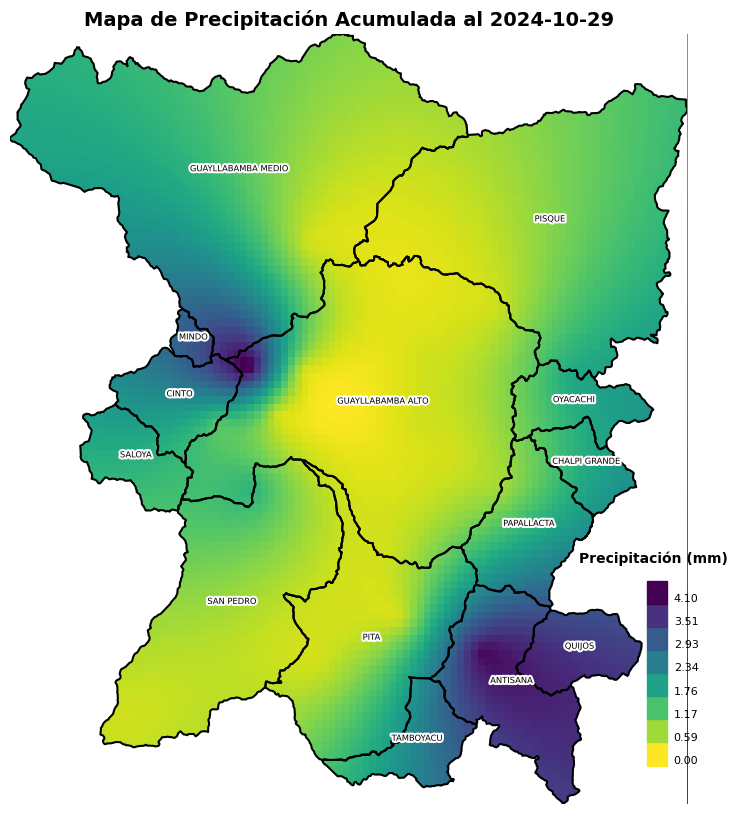

In [1]:
import pandas as pd
import folium
from folium.plugins import MeasureControl
import geopandas as gpd
import branca.colormap as cm
import numpy as np
from metpy.interpolate import interpolate_to_points
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as PathEffects
from shapely.geometry import Polygon
from shapely.ops import unary_union
from datetime import datetime, timedelta

def load_data():
    # Load your station and rainfall data
    epmaps_stations = pd.read_csv('EPMAPS_stations.csv')
    fonag_stations = pd.read_csv('FONAG_stations.csv')
    rainfall_data = pd.read_csv('all_stations_daily_rainfall.csv')
    return epmaps_stations, fonag_stations, rainfall_data

def prepare_data(epmaps_stations, fonag_stations, rainfall_data):
    # Merge the EPMAPS and FONAG stations
    merged_stations = pd.concat([epmaps_stations, fonag_stations], axis=0)

    # Merge the rainfall data with the station metadata
    rainfall_with_stations = pd.merge(
        rainfall_data, merged_stations,
        left_on='station_id', right_on='id_estacion', how='left'
    )

    # Prepare the data with coordinates, station names, and codes
    rainfall_with_station_info = rainfall_with_stations[[
        'fecha', 'PRECIPITACION SUM', 'station_id',
        'punto_obs', 'codigo', 'latitud', 'longitud'
    ]]
    return rainfall_with_station_info

def get_yesterday_date():
    # Calculate the date of the previous day for the title
    yesterday = (datetime.today() - timedelta(days=1)).strftime('%Y-%m-%d')
    return yesterday

def create_colormap(rainfall_with_station_info):
    # Set up the color scale (red for high, blue for low rainfall)
    min_rainfall = rainfall_with_station_info['PRECIPITACION SUM'].min()
    max_rainfall = rainfall_with_station_info['PRECIPITACION SUM'].max()
    colormap = cm.linear.RdYlBu_09.scale(min_rainfall, max_rainfall)
    return colormap

def create_base_map():
    # Create the map centered on the general area of the stations
    m = folium.Map(location=[-0.2, -78.5], zoom_start=10, tiles='CartoDB positron')
    # Add a scale bar (MeasureControl includes distance scale)
    m.add_child(MeasureControl())
    return m

def add_polygon_boundaries(m, gdf):
    # Add the polygon boundaries (outline only) to the map
    for _, poly in gdf.iterrows():
        folium.GeoJson(
            poly['geometry'],
            style_function=lambda feature: {
                'color': 'black',
                'weight': 2,
                'fillOpacity': 0,
            }
        ).add_to(m)

def perform_interpolation(data, provincias_gdf):
    x_min, y_min, x_max, y_max = provincias_gdf.total_bounds
    grid_x, grid_y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
    grid_points = np.column_stack([grid_x.ravel(), grid_y.ravel()])

    grid_z = interpolate_to_points(
        data[['longitud', 'latitud']].values,
        data['PRECIPITACION SUM'].values,
        grid_points,
        interp_type='rbf',
        rbf_func='linear',
        rbf_smooth=0
    ).reshape(grid_x.shape)

    return grid_z, (x_min, y_min, x_max, y_max)

def create_static_plot(grid_z, bounds, provincias_gdf, rainfall_with_station_info, yesterday):
    x_min, y_min, x_max, y_max = bounds

    large_polygon = Polygon([
        (x_min, y_min), (x_min, y_max),
        (x_max, y_max), (x_max, y_min)
    ])
    outside_provinces = large_polygon.difference(unary_union(provincias_gdf.geometry))
    outside_provinces_gdf = gpd.GeoDataFrame(
        geometry=[outside_provinces], crs="EPSG:4326"
    )

    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot the interpolated grid
    plt.imshow(
        grid_z.T, extent=(x_min, x_max, y_min, y_max),
        origin='lower', cmap='viridis_r'
    )

    # Plot the province boundaries
    outside_provinces_gdf.plot(ax=ax, color='white')
    provincias_gdf.boundary.plot(ax=ax, edgecolor='black')

    # Scale bar
    min_precip = rainfall_with_station_info['PRECIPITACION SUM'].min()
    max_precip = rainfall_with_station_info['PRECIPITACION SUM'].max()
    num_intervals = 8
    scale_values = np.linspace(min_precip, max_precip, num_intervals)
    scale_colors = plt.cm.viridis_r(np.linspace(0, 1, len(scale_values)))

    bar_width, bar_height = 0.03, 0.03
    bar_x = 0.94  # Adjust this value to move the legend (scale bar)
    bar_y_start = 0.05

    # Add scale bar text (Precipitation mm)
    ax.text(
        bar_x - 0.1,
        bar_y_start + num_intervals * bar_height + 0.02,
        'Precipitación (mm)',
        transform=ax.transAxes,
        verticalalignment='bottom',
        fontsize=10,
        fontweight='bold'
    )

    # Create scale bar (color patches)
    for i, value in enumerate(scale_values):
        bar_y = bar_y_start + i * bar_height
        rect = patches.Rectangle(
            (bar_x, bar_y), bar_width, bar_height,
            transform=ax.transAxes, color=scale_colors[i]
        )
        ax.add_patch(rect)
        ax.text(
            bar_x + bar_width + 0.01,
            bar_y,
            f'{value:.2f}',
            transform=ax.transAxes,
            verticalalignment='bottom',
            fontsize=8
        )

    # Annotate using 'NAM' column
    for idx, row in provincias_gdf.iterrows():
        annotation = plt.annotate(
            text=row['NAM'],
            xy=(row.geometry.centroid.x, row.geometry.centroid.y),
            xytext=(1, 1), textcoords="offset points",
            ha='center', fontsize=6
        )
        annotation.set_path_effects([
            PathEffects.withStroke(linewidth=3, foreground='white')
        ])

    # Remove axis ticks and labels for a cleaner look
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Add title for the plot
    plt.title(
        f'Mapa de Precipitación Acumulada al {yesterday}',
        fontsize=14,
        fontweight='bold'
    )

    # Save and show plot
    plt.savefig(
        'static_precipitation_plot.png',
        dpi=600,
        bbox_inches='tight',
        pad_inches=0.1
    )
    plt.show()

def add_rainfall_markers(m, data, colormap):
    # Add rainfall data as markers, with radius proportional to rainfall value and solid color
    for _, row in data.iterrows():
        folium.CircleMarker(
            location=[row['latitud'], row['longitud']],
            radius=max(3, row['PRECIPITACION SUM'] * 0.5),  # Scale the marker size
            popup=(
                f"Station: {row['punto_obs']}<br>"
                f"Rainfall: {row['PRECIPITACION SUM']} mm"
            ),
            color=colormap(row['PRECIPITACION SUM']),  # Marker border color
            fill=True,
            fill_color=colormap(row['PRECIPITACION SUM']),  # Marker fill color
            fill_opacity=1,
            opacity=1
        ).add_to(m)

def add_map_title_and_logos(m, yesterday):
    # Add a title using folium's HTML feature
    title_html = f'''
        <h3 align="center" style="font-size:20px">
        <b>Precipitación Diaria del {yesterday} - Red de estaciones EPMAPS- FONAG</b></h3>
    '''
    logo_html_footer = '''
        <div style="position: fixed; bottom: 10px; left: 50px; width: 100%;
        text-align: center; z-index: 9999;">
            <img src="Fonag-Color.png" style="width:150px; height:auto; display: inline-block;">
            <img src="Logo EPMAPS 15 5 23 (Interno).jpg" style="width:150px; height:auto; display: inline-block;">
            <img src="Logo EPMAPS y Alcaldía Quito Renace 15 5 23.jpg" style="width:150px; height:auto; display: inline-block;">
            <img src="inamhi-logo-LETRA-AZUL.png" style="width:150px; height:auto; display: inline-block;">
        </div>
    '''

    # Add the logos and title to the map as HTML
    m.get_root().html.add_child(folium.Element(title_html))
    m.get_root().html.add_child(folium.Element(logo_html_footer))

def save_map(m):
    # Save the map as an HTML file
    m.save('Mapa_diario_EPMAPS_FONAG_interactivo.html')

def main():
    # Load data
    epmaps_stations, fonag_stations, rainfall_data = load_data()

    # Prepare data
    rainfall_with_station_info = prepare_data(epmaps_stations, fonag_stations, rainfall_data)

    # Get yesterday's date
    yesterday = get_yesterday_date()

    # Create colormap
    colormap = create_colormap(rainfall_with_station_info)

    # Create base map
    m = create_base_map()

    # Load the GeoPackage with polygons
    gdf = gpd.read_file('Area.gpkg')

    # Add polygon boundaries to the map
    add_polygon_boundaries(m, gdf)

    # Interpolate rainfall data
    grid_z, bounds = perform_interpolation(rainfall_with_station_info, gdf)

    # Create static plot
    create_static_plot(grid_z, bounds, gdf, rainfall_with_station_info, yesterday)

    # Add rainfall markers to the map
    add_rainfall_markers(m, rainfall_with_station_info, colormap)

    # Add the color scale bar to the map
    colormap.add_to(m)

    # Add title and logos to the map
    add_map_title_and_logos(m, yesterday)

    # Save the map
    save_map(m)

if __name__ == '__main__':
    main()


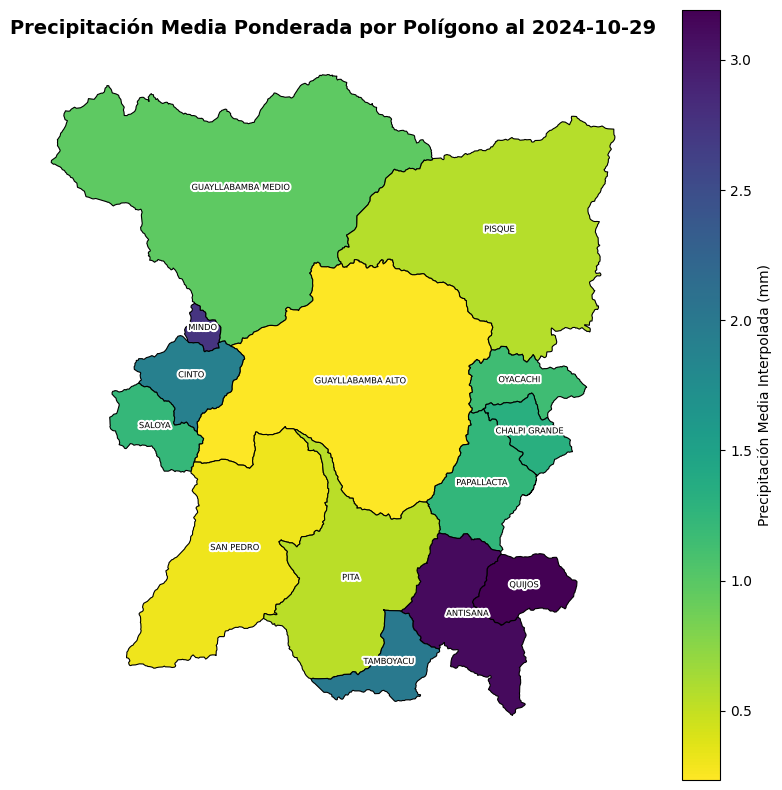

In [2]:
import pandas as pd
import folium
from folium.plugins import MeasureControl
import geopandas as gpd
import branca.colormap as cm
import numpy as np
from metpy.interpolate import interpolate_to_points
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as PathEffects
from shapely.geometry import Point, Polygon
from shapely.ops import unary_union
from datetime import datetime, timedelta

# Load your station and rainfall data
epmaps_stations = pd.read_csv('EPMAPS_stations.csv')
fonag_stations = pd.read_csv('FONAG_stations.csv')
rainfall_data = pd.read_csv('all_stations_daily_rainfall.csv')

# Merge the EPMAPS and FONAG stations
merged_stations = pd.concat([epmaps_stations, fonag_stations], axis=0)

# Merge the rainfall data with the station metadata
rainfall_with_stations = pd.merge(
    rainfall_data, merged_stations,
    left_on='station_id', right_on='id_estacion', how='left'
)

# Prepare the data with coordinates, station names, and codes
rainfall_with_station_info = rainfall_with_stations[[
    'fecha', 'PRECIPITACION SUM', 'station_id',
    'punto_obs', 'codigo', 'latitud', 'longitud'
]]

# Calculate the date of the previous day for the title
yesterday = (datetime.today() - timedelta(days=1)).strftime('%Y-%m-%d')

# Set up the color scale (red for high, blue for low rainfall)
min_rainfall = rainfall_with_station_info['PRECIPITACION SUM'].min()
max_rainfall = rainfall_with_station_info['PRECIPITACION SUM'].max()
colormap = cm.linear.RdYlBu_09.scale(min_rainfall, max_rainfall)

# Create the map centered on the general area of the stations
m = folium.Map(location=[-0.2, -78.5], zoom_start=10, tiles='CartoDB positron')

# Load the GeoPackage with polygons and ensure CRS is consistent
gdf = gpd.read_file('Area.gpkg')
gdf = gdf.to_crs("EPSG:4326")

# Add the polygon boundaries (outline only) to the map
for _, poly in gdf.iterrows():
    folium.GeoJson(
        poly['geometry'],
        style_function=lambda feature: {
            'color': 'black',
            'weight': 2,
            'fillOpacity': 0,
        }
    ).add_to(m)

# Add a scale bar (MeasureControl includes distance scale)
m.add_child(MeasureControl())

# Perform interpolation
def perform_interpolation(data, provincias_gdf):
    x_min, y_min, x_max, y_max = provincias_gdf.total_bounds
    grid_x, grid_y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
    grid_points = np.column_stack([grid_x.ravel(), grid_y.ravel()])

    grid_z = interpolate_to_points(
        data[['longitud', 'latitud']].values, 
        data['PRECIPITACION SUM'].values, 
        grid_points, 
        interp_type='rbf', 
        rbf_func='linear', 
        rbf_smooth=0
    ).reshape(grid_x.shape)

    return grid_x, grid_y, grid_z, (x_min, y_min, x_max, y_max)

# Interpolate rainfall data
grid_x, grid_y, grid_z, bounds = perform_interpolation(rainfall_with_station_info, gdf)

# Flatten the grid data
grid_points_x = grid_x.ravel()
grid_points_y = grid_y.ravel()
grid_values = grid_z.ravel()

# Create a GeoDataFrame from the grid points
grid_df = pd.DataFrame({
    'x': grid_points_x,
    'y': grid_points_y,
    'value': grid_values
})

# Create geometry from the grid points
grid_geometry = [Point(xy) for xy in zip(grid_df['x'], grid_df['y'])]
grid_gdf = gpd.GeoDataFrame(grid_df, geometry=grid_geometry, crs="EPSG:4326")

# Spatially join grid points with polygons
grid_joined = gpd.sjoin(grid_gdf, gdf, how='inner', predicate='within')

# Group by polygon and calculate the mean interpolated precipitation
polygon_precipitation = grid_joined.groupby('index_right').agg({
    'value': 'mean'
}).reset_index()

# Merge the mean precipitation data back to the polygons
gdf['mean_precipitation'] = gdf.index.map(
    polygon_precipitation.set_index('index_right')['value']
)

# Replace NaN values with zeros
gdf['mean_precipitation'] = gdf['mean_precipitation'].fillna(0)

# Function to create the weighted average plot from interpolation
def create_weighted_average_plot_from_interpolation(gdf, yesterday):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Define the colormap and normalization
    min_precip = gdf['mean_precipitation'].min()
    max_precip = gdf['mean_precipitation'].max()
    cmap = plt.cm.viridis_r
    norm = plt.Normalize(vmin=min_precip, vmax=max_precip)
    
    # Plot the polygons colored by mean precipitation
    gdf.plot(
        column='mean_precipitation',
        cmap=cmap,
        linewidth=0.8,
        edgecolor='black',
        norm=norm,
        legend=True,
        legend_kwds={'label': "Precipitación Media Interpolada (mm)"},
        ax=ax
    )
    
    # Annotate polygons with their names
    for idx, row in gdf.iterrows():
        centroid = row['geometry'].centroid
        ax.annotate(
            text=row.get('NAM', ''),
            xy=(centroid.x, centroid.y),
            horizontalalignment='center',
            fontsize=6,
            path_effects=[PathEffects.withStroke(linewidth=3, foreground='white')]
        )
    
    # Remove axis ticks and labels for a cleaner look
    ax.axis('off')
    
    # Add title for the plot
    plt.title(
        f'Precipitación Media Ponderada por Polígono al {yesterday}',
        fontsize=14,
        fontweight='bold'
    )
    
    # Save and display the plot
    plt.savefig(
        'weighted_average_precipitation_interpolated_plot.png',
        dpi=600,
        bbox_inches='tight',
        pad_inches=0.1
    )
    plt.show()

# Create the weighted average plot from interpolation
create_weighted_average_plot_from_interpolation(gdf, yesterday)

# The rest of your code remains the same...


In [34]:
import pandas as pd
import folium
from folium.plugins import MeasureControl
import geopandas as gpd
from branca.colormap import LinearColormap
import numpy as np
from metpy.interpolate import interpolate_to_points
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from shapely.geometry import Point
from datetime import datetime, timedelta

# Load your station and rainfall data
epmaps_stations = pd.read_csv('EPMAPS_stations.csv')
fonag_stations = pd.read_csv('FONAG_stations.csv')
rainfall_data = pd.read_csv('all_stations_daily_rainfall.csv')

# Merge the EPMAPS and FONAG stations
merged_stations = pd.concat([epmaps_stations, fonag_stations], axis=0)

# Merge the rainfall data with the station metadata
rainfall_with_stations = pd.merge(
    rainfall_data, merged_stations,
    left_on='station_id', right_on='id_estacion', how='left'
)

# Prepare the data with coordinates, station names, and codes
rainfall_with_station_info = rainfall_with_stations[[
    'fecha', 'PRECIPITACION SUM', 'station_id',
    'punto_obs', 'codigo', 'latitud', 'longitud'
]]

# Calculate the date of the previous day for the title
yesterday = (datetime.today() - timedelta(days=1)).strftime('%Y-%m-%d')

# Set up the color scale for station markers
min_rainfall = rainfall_with_station_info['PRECIPITACION SUM'].min()
max_rainfall = rainfall_with_station_info['PRECIPITACION SUM'].max()

# Create the colormap for station markers using matplotlib
n_colors = 256
rdylbu = cm.get_cmap('RdYlBu', n_colors)
station_colors = [mcolors.rgb2hex(rdylbu(i)) for i in range(n_colors)]
station_colormap = LinearColormap(
    station_colors, vmin=min_rainfall, vmax=max_rainfall, caption='Station Precipitation (mm)'
)

# Create the map centered on the general area of the stations
m = folium.Map(location=[-0.2, -78.5], zoom_start=10, tiles='CartoDB positron')

# Load the GeoPackage with polygons and ensure CRS is consistent
gdf = gpd.read_file('Area.gpkg')
gdf = gdf.to_crs("EPSG:4326")

# Add the polygon boundaries (outline only) to the map
for _, poly in gdf.iterrows():
    folium.GeoJson(
        poly['geometry'],
        style_function=lambda feature: {
            'color': 'black',
            'weight': 2,
            'fillOpacity': 0,
        }
    ).add_to(m)

# Add a scale bar (MeasureControl includes distance scale)
m.add_child(MeasureControl())

# Perform interpolation
def perform_interpolation(data, provincias_gdf):
    x_min, y_min, x_max, y_max = provincias_gdf.total_bounds
    grid_x, grid_y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
    grid_points = np.column_stack([grid_x.ravel(), grid_y.ravel()])

    grid_z = interpolate_to_points(
        data[['longitud', 'latitud']].values, 
        data['PRECIPITACION SUM'].values, 
        grid_points, 
        interp_type='rbf', 
        rbf_func='linear', 
        rbf_smooth=0
    ).reshape(grid_x.shape)

    return grid_x, grid_y, grid_z, (x_min, y_min, x_max, y_max)

# Interpolate rainfall data
grid_x, grid_y, grid_z, bounds = perform_interpolation(rainfall_with_station_info, gdf)

# Flatten the grid data
grid_points_x = grid_x.ravel()
grid_points_y = grid_y.ravel()
grid_values = grid_z.ravel()

# Create a GeoDataFrame from the grid points
grid_df = pd.DataFrame({
    'x': grid_points_x,
    'y': grid_points_y,
    'value': grid_values
})

# Create geometry from the grid points
grid_geometry = [Point(xy) for xy in zip(grid_df['x'], grid_df['y'])]
grid_gdf = gpd.GeoDataFrame(grid_df, geometry=grid_geometry, crs="EPSG:4326")

# Spatially join grid points with polygons
grid_joined = gpd.sjoin(grid_gdf, gdf, how='inner', predicate='within')

# Group by polygon and calculate the mean interpolated precipitation
polygon_precipitation = grid_joined.groupby('index_right').agg({
    'value': 'mean'
}).reset_index()

# Merge the mean precipitation data back to the polygons
gdf['mean_precipitation'] = gdf.index.map(
    polygon_precipitation.set_index('index_right')['value']
)

# Replace NaN values with zeros
gdf['mean_precipitation'] = gdf['mean_precipitation'].fillna(0)

# Ensure 'mean_precipitation' is of type float
gdf['mean_precipitation'] = gdf['mean_precipitation'].astype(float)

# Define the colormap for the polygons using matplotlib's 'viridis' colormap
n_colors = 256
viridis = cm.get_cmap('viridis_r', n_colors)
polygon_colors = [mcolors.rgb2hex(viridis(i)) for i in range(n_colors)]
min_precip = gdf['mean_precipitation'].min()
max_precip = gdf['mean_precipitation'].max()
polygon_colormap = LinearColormap(
    polygon_colors, vmin=min_precip, vmax=max_precip, caption='Mean Interpolated Precipitation (mm)'
)

# Function to style polygons
def style_function(feature):
    precipitation = feature['properties']['mean_precipitation']
    return {
        'fillColor': polygon_colormap(precipitation) if precipitation is not None else 'transparent',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7,
    }

# Add the polygons to the map with mean precipitation
folium.GeoJson(
    gdf,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=['NAM', 'mean_precipitation'],
                                  aliases=['Polygon Name:', 'Mean Precipitation (mm):'],
                                  localize=True)
).add_to(m)

# Add the color scale to the map
polygon_colormap.add_to(m)

# Add rainfall data as markers, with radius proportional to rainfall value and solid color
for _, row in rainfall_with_station_info.iterrows():
    folium.CircleMarker(
        location=[row['latitud'], row['longitud']],
        radius=max(3, row['PRECIPITACION SUM'] * 0.5),  # Scale the marker size
        popup=f"Station: {row['punto_obs']}<br>Rainfall: {row['PRECIPITACION SUM']} mm",
        color=station_colormap(row['PRECIPITACION SUM']),  # Marker border color
        fill=True,
        fill_color=station_colormap(row['PRECIPITACION SUM']),  # Marker fill color
        fill_opacity=1,
        opacity=1
    ).add_to(m)

# Add the color scale bar for stations to the map
station_colormap.add_to(m)

# Add a title using folium's HTML feature
title_html = f'''
    <h3 align="center" style="font-size:20px">
    <b>Precipitación Media Ponderada por Polígono al {yesterday} - Red de estaciones EPMAPS-FONAG</b></h3>
    '''
logo_html_footer = '''
     <div style="position: fixed; bottom: 10px; left: 50px; width: 100%; text-align: center; z-index: 9999;">
         <img src="Fonag-Color.png" style="width:150px; height:auto; display: inline-block;">
         <img src="Logo EPMAPS 15 5 23 (Interno).jpg" style="width:150px; height:auto; display: inline-block;">
         <img src="Logo EPMAPS y Alcaldía Quito Renace 15 5 23.jpg" style="width:150px; height:auto; display: inline-block;">
         <img src="inamhi-logo-LETRA-AZUL.png" style="width:150px; height:auto; display: inline-block;">
     </div>
'''

# Add the logos and title to the map as HTML
m.get_root().html.add_child(folium.Element(title_html))
m.get_root().html.add_child(folium.Element(logo_html_footer))

# Save the map as an HTML file
m.save('Mapa_diario_EPMAPS_FONAG_interactivo_ponderado.html')


C:\Users\U$ER\AppData\Local\Temp\ipykernel_10924\2600359763.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  rdylbu = cm.get_cmap('RdYlBu', n_colors)
C:\Users\U$ER\AppData\Local\Temp\ipykernel_10924\2600359763.py:127: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis_r', n_colors)
